# Car Price Prediction Regression Tree
dataset source: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction <br>
by: Luis Dogo

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error

# Dataset Generalities
there are 0 NULL values in all the attributes. <br>
number of entries: 205 <br>
number of attributes(excluding target and ID): 24

In [72]:
df = pd.read_csv("CarPrice.csv")
y = df.price
X = df.drop(columns = "price")

## Transformación de datos

In [73]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [74]:
X = X.replace(cleanup_nums)


/tmp/ipykernel_78762/3995177751.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(cleanup_nums)


In [75]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

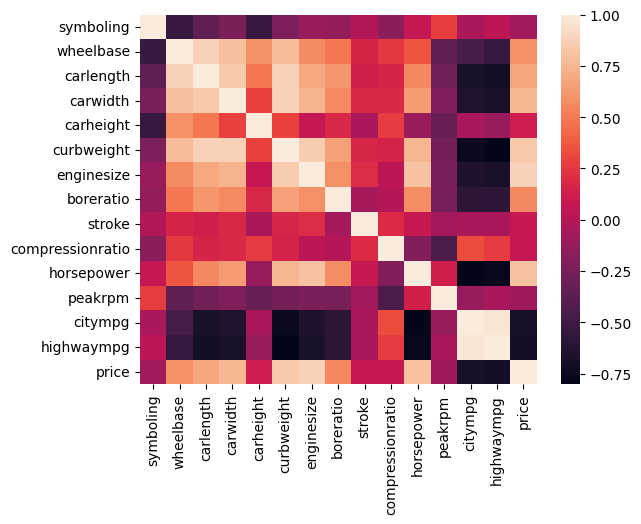

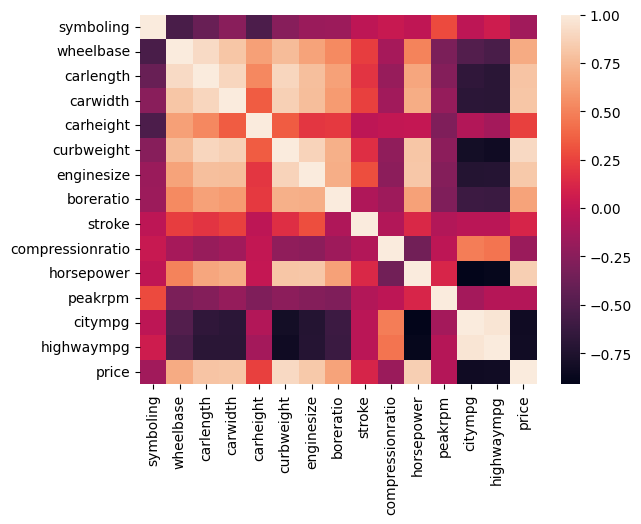

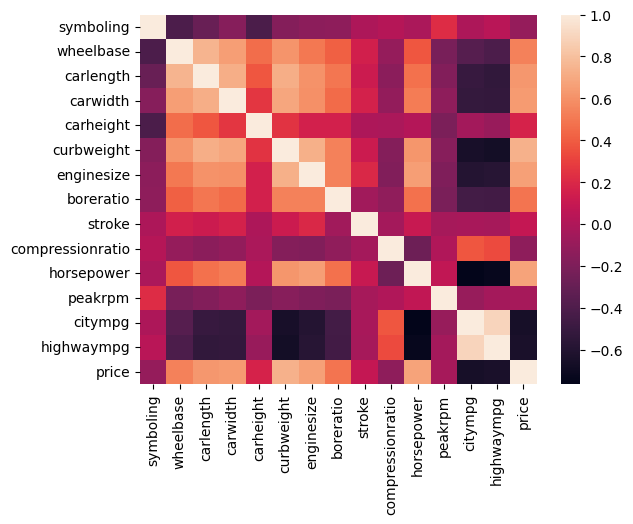

In [76]:
df2 = df.drop(columns = ["car_ID"]).select_dtypes(exclude=['object'])
sns.heatmap(df2.corr(method = "pearson"))
plt.show()
sns.heatmap(df2.corr(method = "spearman"))
plt.show()
sns.heatmap(df2.corr(method = "kendall"))
plt.show()

In [77]:
X.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26


/home/luisdogo/Decision Tree/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/luisdogo/Decision Tree/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/luisdogo/Decision Tree/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/luisdogo/Decision Tree/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/luisdogo/Decision Tree/.ve

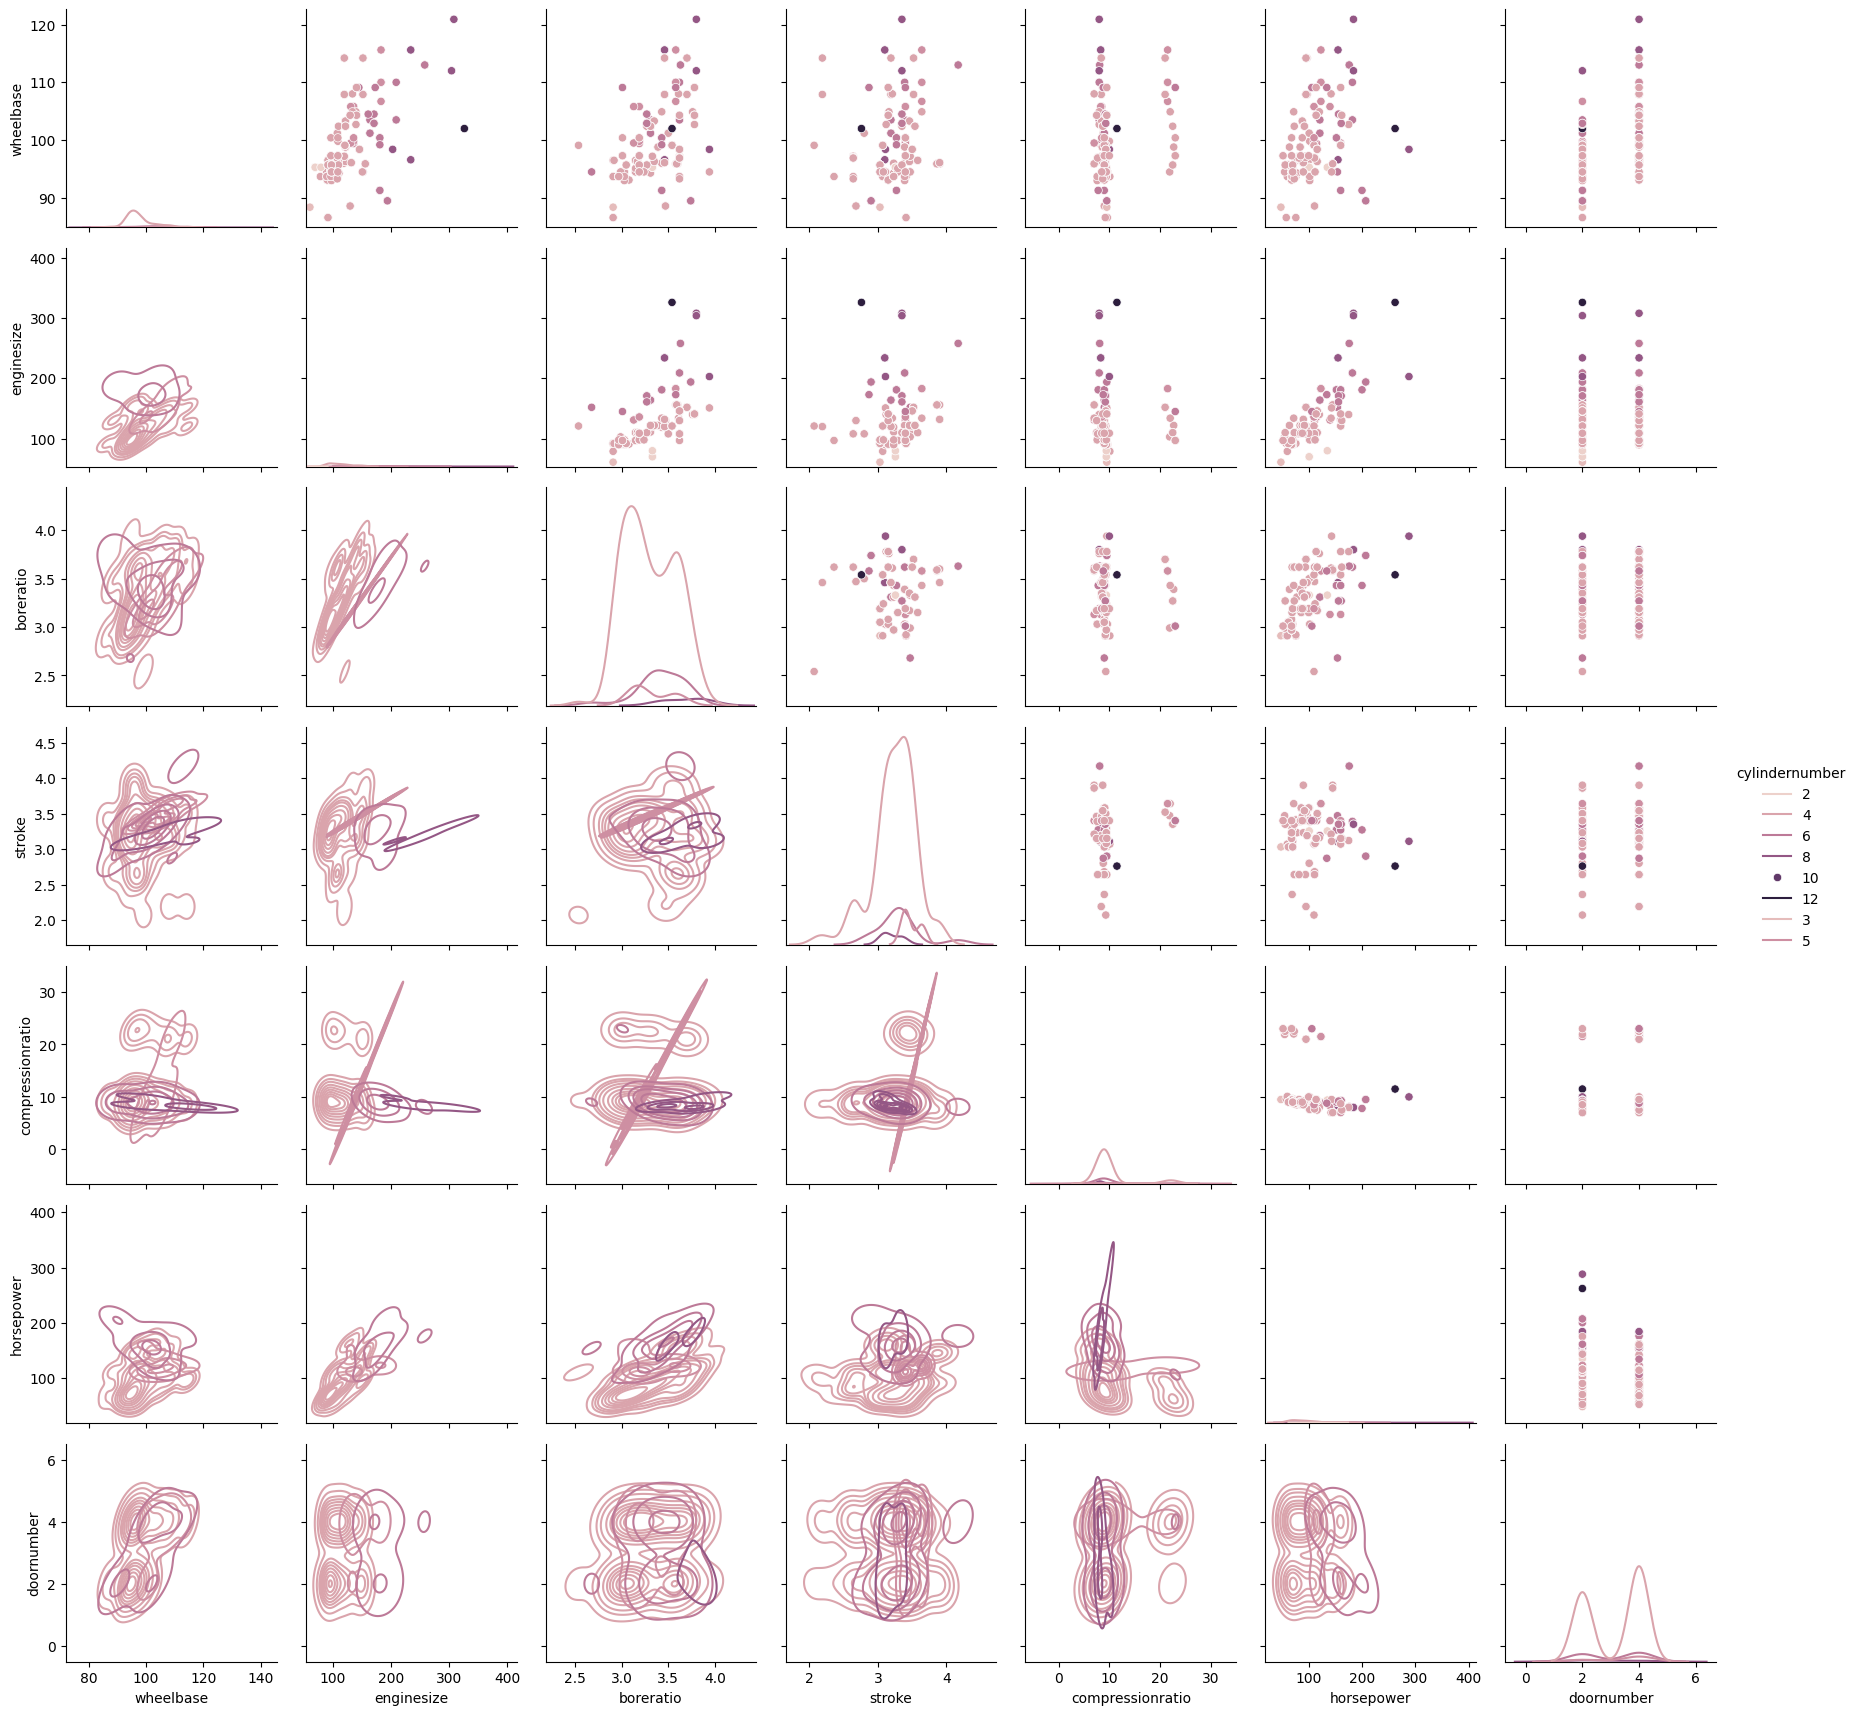

In [78]:
g = sns.PairGrid(X[["wheelbase", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "doornumber", "cylindernumber"]], hue = "cylindernumber")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
g.add_legend()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X[["horsepower", "peakrpm"]], y, test_size=0.33, random_state=42)

In [85]:
cvi = 11

# First Iteration of the model
"horsepower", "peakrpm" are used

In [89]:
regressor = DecisionTreeRegressor(random_state= 10)
regressor = regressor.fit(X_train, y_train)

0.63 accuracy with a standard deviation of 0.05
0.73 accuracy with a standard deviation of 0.06
0.86 accuracy with a standard deviation of 0.04
0.83 accuracy with a standard deviation of 0.08
0.81 accuracy with a standard deviation of 0.09
0.73 accuracy with a standard deviation of 0.11
0.80 accuracy with a standard deviation of 0.11
0.76 accuracy with a standard deviation of 0.16
0.81 accuracy with a standard deviation of 0.09


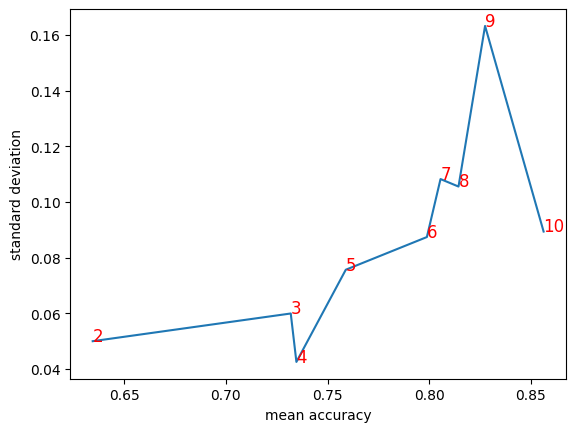

In [90]:
m = []
s = [] 
for i in range(2,cvi):
    score = cross_val_score(regressor, X_train, y_train, cv = i)
    m.append(score.mean())
    s.append(score.std())
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
means = np.array(m)
stds = np.array(s)
means.sort()
plt.plot(means, stds)
i = 2
for x, y in zip(means, stds):
    plt.text(x, y, str(i), color="red", fontsize=12)
    i += 1
plt.plot(means.mean(), stds.mean())
plt.xlabel("mean accuracy")
plt.ylabel("standard deviation")
plt.show()

In [ ]:
y_pred = regressor.predict(X_test)

In [91]:
print(f'Error Promedio Absoluto: {mean_absolute_error(y_test, y_pred)}')
print(f'Erro Cuadrático Medio: {root_mean_squared_error(y_test, y_pred)}')
print(f'Porcentaje de Error Medio Absoluto {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'puntjae R2: {r2_score(y_test, y_pred)}')


Error Promedio Absoluto: 2082.438720588235
Erro Cuadrático Medio: 3375.3290310067837
Porcentaje de Error Medio Absoluto 0.15704138393845113
puntjae R2: 0.8258912327198648


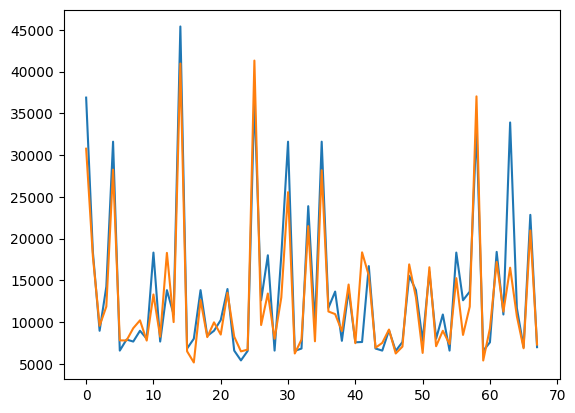

In [ ]:
plt.plot(range(len(y_pred)), y_pred)
plt.plot(range(len(y_test)), y_test)